
# **Problem Statement: Airbnb Hotel Booking Analysis.**

The hospitality industry has undergone a significant transformation with the rise of online platforms facilitating short-term lodging and tourism. Leading this revolution is Airbnb, Inc., a pioneering American company that has reshaped travel accommodation through its innovative online marketplace. Established in 2008 in San Francisco, California, Airbnb provides a diverse range of lodging options, offering guests a unique and personalized experience. Unlike traditional hospitality providers, Airbnb operates on a commission-based model, facilitating transactions between hosts and guests without owning the properties listed on its platform.

This research analysis delves into the New York City Airbnb dataset to extract meaningful insights. Through rigorous data cleaning, exploratory analysis, and visualization techniques, the study aims to illuminate the dynamics of the city's lodging market. By discerning factors influencing listing availability, pricing strategies, and overall customer satisfaction, the research contributes to a deeper understanding of Airbnb's operations in one of the world's most dynamic urban environments. These insights hold significance for stakeholders and enthusiasts seeking to navigate the evolving landscape of short-term accommodation.


# **QUESTIONS**

1. This project is aimed to uncover some insights from the Airbnb Open Data. The following questions would be answered from the data:

2. What are the different property types in the Dataset?

3. Which neighborhood group has the highest number of listings?

4. Which neighborhoods group have the highest average prices for Airbnb listings?

5. Is there a relationship between the construction year of property and price?

6. Who are the top 10 hosts by calculated host listing count?

7. Are hosts with verified identities more likely to receive positive reviews?

8. Is there a correlation between the price of a listing and its service fee?

9. What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?

Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?


# **DATA WRANGLING**
Data wrangling, a crucial phase in the data analysis process, involves preparing and cleaning raw data to make it suitable for analysis. This involves various tasks such as handling missing values, removing duplicates, and transforming data into a consistent format. Effective data wrangling ensures that the data is reliable and ready for exploration, enabling meaningful insights to be derived from it.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

print("Libraries imported successfully!")

Libraries imported successfully!


# **Data Loading and Initial Exploration**

In [2]:
# Load the dataset
df = pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx')

# Display basic information about the dataset
print("=== DATASET OVERVIEW ===")
print(f"Dataset Shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

print("\n=== COLUMN NAMES ===")
print(df.columns.tolist())

print("\n=== DATATYPES ===")
print(df.dtypes)

print("\n=== FIRST 5 ROWS ===")
display(df.head())

print("\n=== BASIC STATISTICS ===")
display(df.describe())

=== DATASET OVERVIEW ===
Dataset Shape: (102599, 26)
Number of rows: 102599
Number of columns: 26

=== COLUMN NAMES ===
['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license']

=== DATATYPES ===
id                                         int64
NAME                                      object
host id                                    int64
host_identity_verified                    object
host name                                 object
neighbourhood group                       object
neighbourhood                             object
lat                                      float64
long                                     flo

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN



=== BASIC STATISTICS ===


,id,host id,lat,long,instant_bookable,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102494.000000,102385.000000,102352.000000,102326.000000,102190.000000,102416.000000,86706,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,0.497785,2012.487464,625.293536,125.026924,8.135845,27.483743,2019-06-12 03:40:52.065601024,1.374022,3.279106,7.936605,141.133254
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,0.000000,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,0.000000,2007.000000,340.000000,68.000000,2.000000,1.000000,2018-10-28 00:00:00,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,0.000000,2012.000000,624.000000,125.000000,3.000000,7.000000,2019-06-14 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,1.000000,2017.000000,913.000000,183.000000,5.000000,30.000000,2019-07-05 00:00:00,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.625751e+07,2.853900e+10,0.055857,0.049521,0.499998,5.765556,331.671614,66.325739,30.553781,49.508954,NaN,1.746621,1.284657,32.218780,135.435024


# **Data Cleaning and Preprocessing**

In [3]:
# Create a copy for cleaning
df_clean = df.copy()

print("=== DATA CLEANING PROCESS ===")
print("Initial shape:", df_clean.shape)

# 1. Clean price column
print("\n1. Cleaning price column...")
df_clean['price'] = df_clean['price'].astype(str).str.replace('$', '', regex=False)
df_clean['price'] = df_clean['price'].str.replace(',', '', regex=False)
df_clean['price'] = pd.to_numeric(df_clean['price'], errors='coerce')

# 2. Clean service fee column
print("2. Cleaning service fee column...")
df_clean['service fee'] = df_clean['service fee'].astype(str).str.replace('$', '', regex=False)
df_clean['service fee'] = df_clean['service fee'].str.replace(',', '', regex=False)
df_clean['service fee'] = pd.to_numeric(df_clean['service fee'], errors='coerce')

# 3. Clean categorical columns
print("3. Cleaning categorical columns...")
categorical_columns = ['neighbourhood group', 'neighbourhood', 'room type',
                      'host_identity_verified', 'instant_bookable', 'cancellation_policy']

for col in categorical_columns:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype(str).str.strip().str.title()

# 4. Clean numerical columns
print("4. Cleaning numerical columns...")
numerical_columns = ['minimum nights', 'number of reviews', 'reviews per month',
                    'review rate number', 'calculated host listings count', 'availability 365']

for col in numerical_columns:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# 5. Handle missing values
print("5. Handling missing values...")
initial_count = len(df_clean)
df_clean = df_clean.dropna(subset=['price', 'neighbourhood group', 'room type'])
final_count = len(df_clean)

print(f"Rows removed due to missing values: {initial_count - final_count}")
print(f"Final dataset shape: {df_clean.shape}")

# Display cleaned data info
print("\n=== CLEANED DATASET INFO ===")
print(f"Missing values per column:")
print(df_clean.isnull().sum())

=== DATA CLEANING PROCESS ===
Initial shape: (102599, 26)

1. Cleaning price column...
2. Cleaning service fee column...
3. Cleaning categorical columns...
4. Cleaning numerical columns...
5. Handling missing values...
Rows removed due to missing values: 247
Final dataset shape: (102352, 26)

=== CLEANED DATASET INFO ===
Missing values per column:
id                                     0
NAME                                 267
host id                                0
host_identity_verified                 0
host name                            403
neighbourhood group                    0
neighbourhood                          0
lat                                    8
long                                   8
country                              527
country code                         126
instant_bookable                       0
cancellation_policy                    0
room type                              0
Construction year                    210
price                              

# **Exploratory Data Analysis**
1. What are the different property types in the Dataset?

=== QUESTION 1: PROPERTY TYPES ANALYSIS ===


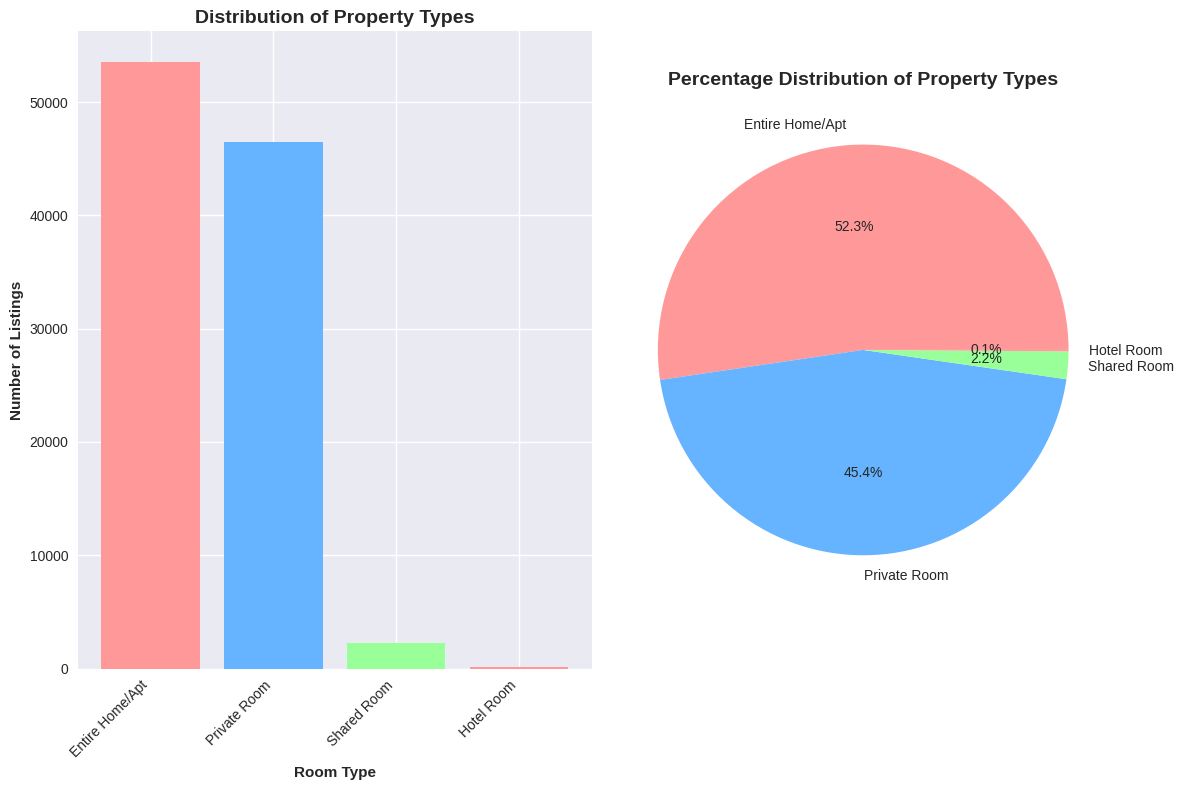


Property Types Summary:
1. Entire Home/Apt: 53,568 listings (52.3%)
2. Private Room: 46,450 listings (45.4%)
3. Shared Room: 2,218 listings (2.2%)
4. Hotel Room: 116 listings (0.1%)


In [4]:
print("=== QUESTION 1: PROPERTY TYPES ANALYSIS ===")

# Count property types
property_types = df_clean['room type'].value_counts()

plt.figure(figsize=(12, 8))

# Create subplot for better visualization
plt.subplot(1, 2, 1)
plt.bar(property_types.index, property_types.values, color=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Distribution of Property Types', fontsize=14, fontweight='bold')
plt.xlabel('Room Type', fontweight='bold')
plt.ylabel('Number of Listings', fontweight='bold')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.pie(property_types.values, labels=property_types.index, autopct='%1.1f%%',
        colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Percentage Distribution of Property Types', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nProperty Types Summary:")
for i, (prop_type, count) in enumerate(property_types.items(), 1):
    percentage = (count / len(df_clean)) * 100
    print(f"{i}. {prop_type}: {count:,} listings ({percentage:.1f}%)")

**2. Which neighborhood group has the highest number of listings? bold text**

=== QUESTION 2: NEIGHBORHOOD GROUP ANALYSIS ===


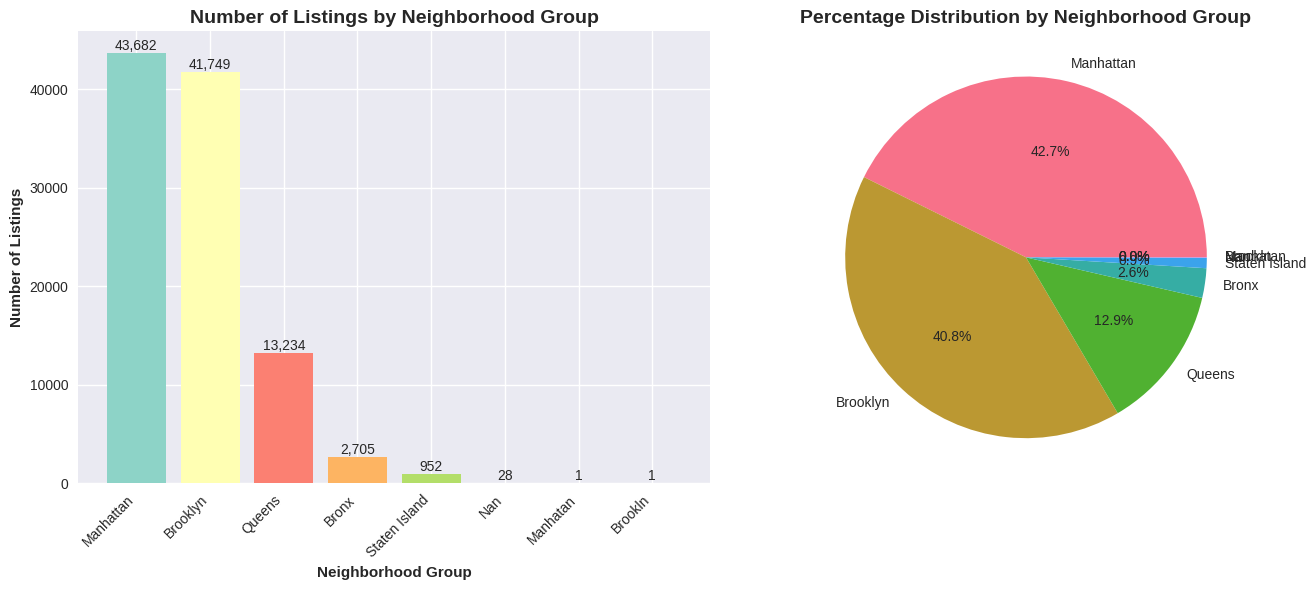


Neighborhood Group Summary:
1. Manhattan: 43,682 listings (42.7%)
2. Brooklyn: 41,749 listings (40.8%)
3. Queens: 13,234 listings (12.9%)
4. Bronx: 2,705 listings (2.6%)
5. Staten Island: 952 listings (0.9%)
6. Nan: 28 listings (0.0%)
7. Manhatan: 1 listings (0.0%)
8. Brookln: 1 listings (0.0%)

 Neighborhood group with highest listings: Manhattan with 43,682 listings


In [27]:
print("=== QUESTION 2: NEIGHBORHOOD GROUP ANALYSIS ===")

neighborhood_counts = df_clean['neighbourhood group'].value_counts()

plt.figure(figsize=(14, 6))

# Bar chart
plt.subplot(1, 2, 1)
bars = plt.bar(neighborhood_counts.index, neighborhood_counts.values,
               color=plt.cm.Set3(np.linspace(0, 1, len(neighborhood_counts))))
plt.title('Number of Listings by Neighborhood Group', fontsize=14, fontweight='bold')
plt.xlabel('Neighborhood Group', fontweight='bold')
plt.ylabel('Number of Listings', fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom')

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(neighborhood_counts.values, labels=neighborhood_counts.index, autopct='%1.1f%%')
plt.title('Percentage Distribution by Neighborhood Group', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nNeighborhood Group Summary:")
for i, (neighborhood, count) in enumerate(neighborhood_counts.items(), 1):
    percentage = (count / len(df_clean)) * 100
    print(f"{i}. {neighborhood}: {count:,} listings ({percentage:.1f}%)")

print(f"\n Neighborhood group with highest listings: {neighborhood_counts.index[0]} with {neighborhood_counts.iloc[0]:,} listings")

**3. Which neighborhoods group have the highest average prices for Airbnb listings?**

=== QUESTION 3: AVERAGE PRICES BY NEIGHBORHOOD GROUP ===


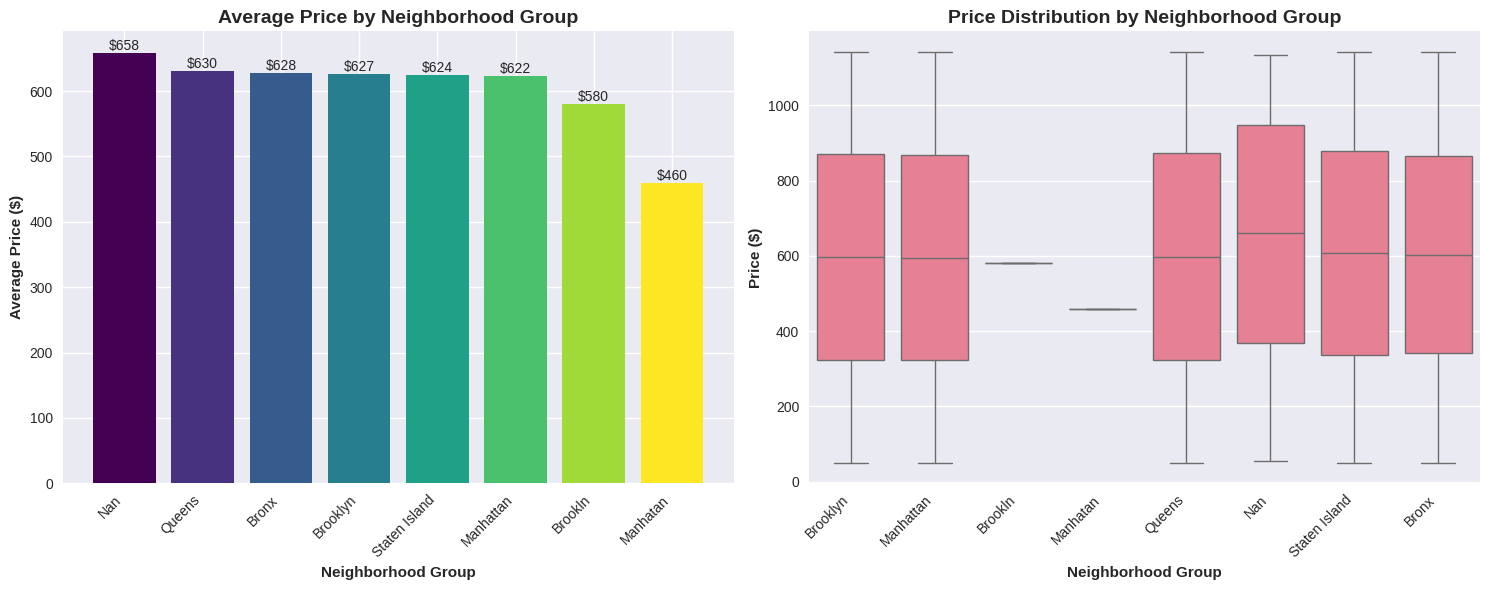


Average Prices by Neighborhood Group:


,mean,median,std
neighbourhood group,,,
Nan,658.36,661.0,336.41
Queens,630.21,628.0,334.18
Bronx,627.77,633.0,324.06
Brooklyn,626.56,626.0,331.87
Staten Island,624.49,628.0,326.01
Manhattan,622.44,621.0,331.30
Brookln,580.00,580.0,NaN
Manhatan,460.00,460.0,NaN



 Neighborhood group with highest average price: Nan at $658.36


In [26]:
print("=== QUESTION 3: AVERAGE PRICES BY NEIGHBORHOOD GROUP ===")

avg_price_by_neighborhood = df_clean.groupby('neighbourhood group')['price'].agg(['mean', 'median', 'std']).round(2)
avg_price_by_neighborhood_sorted = avg_price_by_neighborhood.sort_values('mean', ascending=False)

plt.figure(figsize=(15, 6))

# Average price bar chart
plt.subplot(1, 2, 1)
bars = plt.bar(avg_price_by_neighborhood_sorted.index, avg_price_by_neighborhood_sorted['mean'],
               color=plt.cm.viridis(np.linspace(0, 1, len(avg_price_by_neighborhood_sorted))))
plt.title('Average Price by Neighborhood Group', fontsize=14, fontweight='bold')
plt.xlabel('Neighborhood Group', fontweight='bold')
plt.ylabel('Average Price ($)', fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.0f}', ha='center', va='bottom')

# Box plot to show price distribution
plt.subplot(1, 2, 2)
# Remove extreme outliers for better visualization
price_filtered = df_clean[df_clean['price'] < df_clean['price'].quantile(0.95)]
sns.boxplot(data=price_filtered, x='neighbourhood group', y='price')
plt.title('Price Distribution by Neighborhood Group', fontsize=14, fontweight='bold')
plt.xlabel('Neighborhood Group', fontweight='bold')
plt.ylabel('Price ($)', fontweight='bold')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("\nAverage Prices by Neighborhood Group:")
display(avg_price_by_neighborhood_sorted)

print(f"\n Neighborhood group with highest average price: {avg_price_by_neighborhood_sorted.index[0]} at ${avg_price_by_neighborhood_sorted['mean'].iloc[0]:.2f}")

**4. Is there a relationship between the construction year of property and price?**

=== QUESTION 4: CONSTRUCTION YEAR VS PRICE ANALYSIS ===


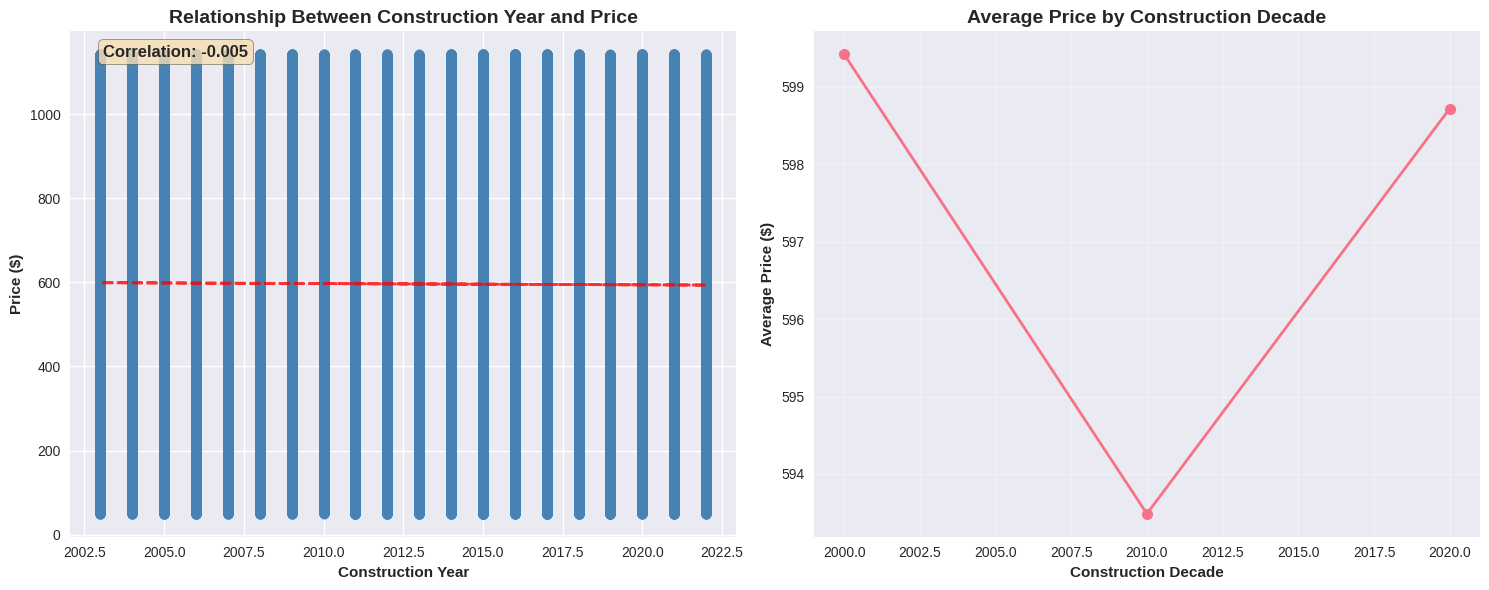

Correlation between construction year and price: -0.005
 There appears to be a negative relationship: newer properties tend to have lower prices


In [25]:
print("=== QUESTION 4: CONSTRUCTION YEAR VS PRICE ANALYSIS ===")

if 'Construction year' in df_clean.columns:
    # Filter data for better visualization
    construction_price_data = df_clean[
        (df_clean['Construction year'] > 1900) &
        (df_clean['Construction year'] < 2024) &
        (df_clean['price'] < df_clean['price'].quantile(0.95))
    ].copy()

    plt.figure(figsize=(15, 6))

    # Scatter plot
    plt.subplot(1, 2, 1)
    plt.scatter(construction_price_data['Construction year'], construction_price_data['price'],
                alpha=0.6, s=50, color='steelblue')
    plt.title('Relationship Between Construction Year and Price', fontsize=14, fontweight='bold')
    plt.xlabel('Construction Year', fontweight='bold')
    plt.ylabel('Price ($)', fontweight='bold')

    # Add trend line
    z = np.polyfit(construction_price_data['Construction year'], construction_price_data['price'], 1)
    p = np.poly1d(z)
    plt.plot(construction_price_data['Construction year'], p(construction_price_data['Construction year']),
             "r--", alpha=0.8, linewidth=2)

    # Calculate correlation
    correlation = construction_price_data['Construction year'].corr(construction_price_data['price'])
    plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes,
             bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8),
             fontsize=12, fontweight='bold')

    # Price by construction decade
    plt.subplot(1, 2, 2)
    construction_price_data['decade'] = (construction_price_data['Construction year'] // 10) * 10
    price_by_decade = construction_price_data.groupby('decade')['price'].mean()

    plt.plot(price_by_decade.index, price_by_decade.values, marker='o', linewidth=2, markersize=8)
    plt.title('Average Price by Construction Decade', fontsize=14, fontweight='bold')
    plt.xlabel('Construction Decade', fontweight='bold')
    plt.ylabel('Average Price ($)', fontweight='bold')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"Correlation between construction year and price: {correlation:.3f}")

    if correlation < 0:
        print(" There appears to be a negative relationship: newer properties tend to have lower prices")
    elif correlation > 0:
        print(" There appears to be a positive relationship: newer properties tend to have higher prices")
    else:
        print(" No clear relationship between construction year and price")

else:
    print("Construction year column not found in the dataset")

**5. Who are the top 10 hosts by calculated host listing count?**

=== QUESTION 5: TOP HOSTS BY LISTING COUNT ===


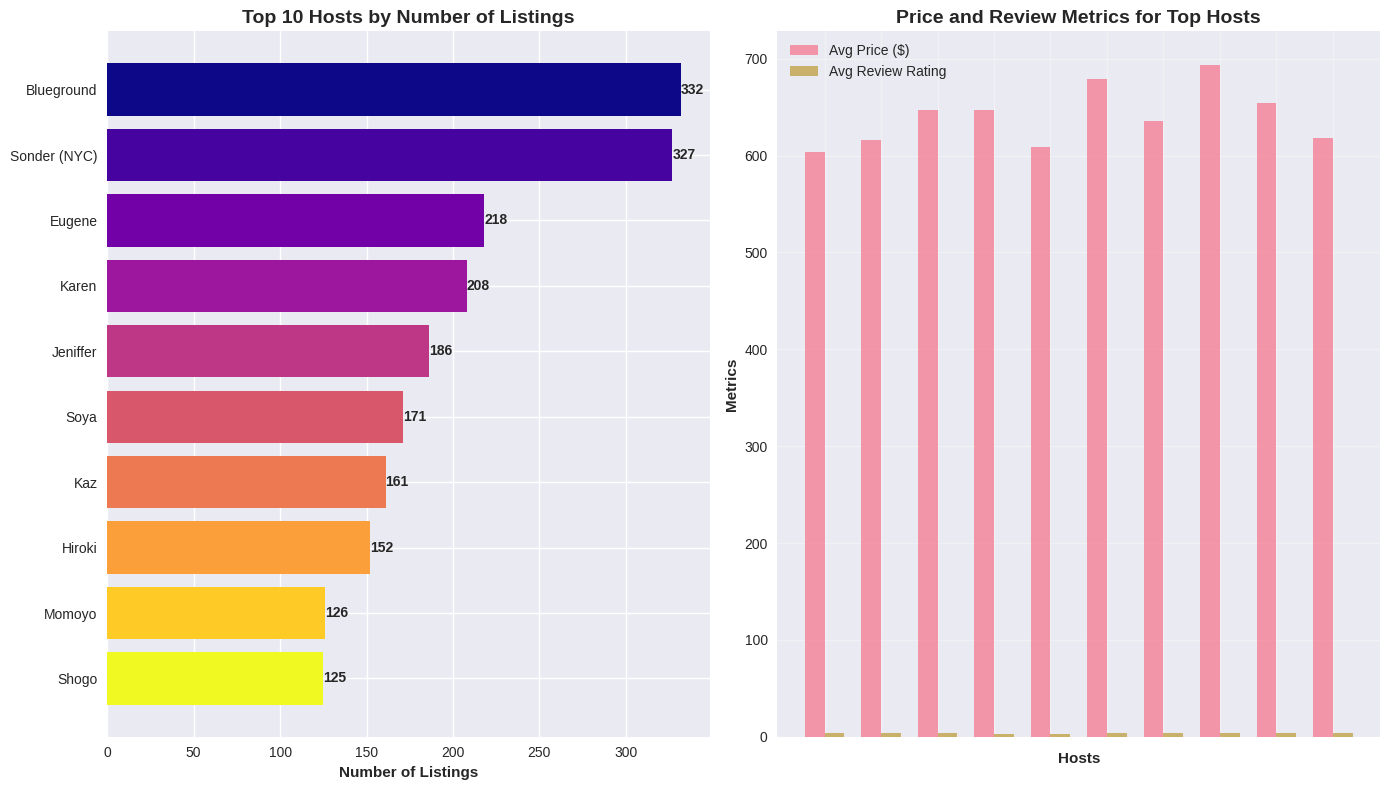

Top 10 Hosts by Listing Count:


,calculated host listings count,price,review rate number
host name,,,
Blueground,332.0,603.37,3.41
Sonder (NYC),327.0,616.57,3.55
Eugene,218.0,646.79,3.52
Karen,208.0,646.76,3.17
Jeniffer,186.0,609.29,3.25
Soya,171.0,678.92,3.53
Kaz,161.0,635.87,3.64
Hiroki,152.0,693.66,3.59
Momoyo,126.0,653.83,3.66



 Summary of Top Hosts:
Average listings per top host: 200.6
Average price for top hosts: $640.29
Average review rating for top hosts: 3.49


In [24]:
print("=== QUESTION 5: TOP HOSTS BY LISTING COUNT ===")

# Group by host and get maximum listing count
top_hosts = df_clean.groupby('host name').agg({
    'calculated host listings count': 'max',
    'price': 'mean',
    'review rate number': 'mean'
}).round(2).sort_values('calculated host listings count', ascending=False).head(10)

plt.figure(figsize=(14, 8))

# Horizontal bar chart
plt.subplot(1, 2, 1)
bars = plt.barh(range(len(top_hosts)), top_hosts['calculated host listings count'],
                color=plt.cm.plasma(np.linspace(0, 1, len(top_hosts))))
plt.yticks(range(len(top_hosts)), top_hosts.index)
plt.title('Top 10 Hosts by Number of Listings', fontsize=14, fontweight='bold')
plt.xlabel('Number of Listings', fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2.,
             f'{int(width)}', ha='left', va='center', fontweight='bold')

# Additional metrics for top hosts
plt.subplot(1, 2, 2)
x_pos = np.arange(len(top_hosts))
width = 0.35

plt.bar(x_pos - width/2, top_hosts['price'], width, label='Avg Price ($)', alpha=0.7)
plt.bar(x_pos + width/2, top_hosts['review rate number'], width, label='Avg Review Rating', alpha=0.7)

plt.xlabel('Hosts', fontweight='bold')
plt.ylabel('Metrics', fontweight='bold')
plt.title('Price and Review Metrics for Top Hosts', fontsize=14, fontweight='bold')
plt.xticks(x_pos, [''] * len(top_hosts))  # Remove host names for clarity
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Top 10 Hosts by Listing Count:")
display(top_hosts)

print("\n Summary of Top Hosts:")
print(f"Average listings per top host: {top_hosts['calculated host listings count'].mean():.1f}")
print(f"Average price for top hosts: ${top_hosts['price'].mean():.2f}")
print(f"Average review rating for top hosts: {top_hosts['review rate number'].mean():.2f}")

**6. Are hosts with verified identities more likely to receive positive reviews?**

=== QUESTION 6: HOST VERIFICATION VS REVIEW ANALYSIS ===


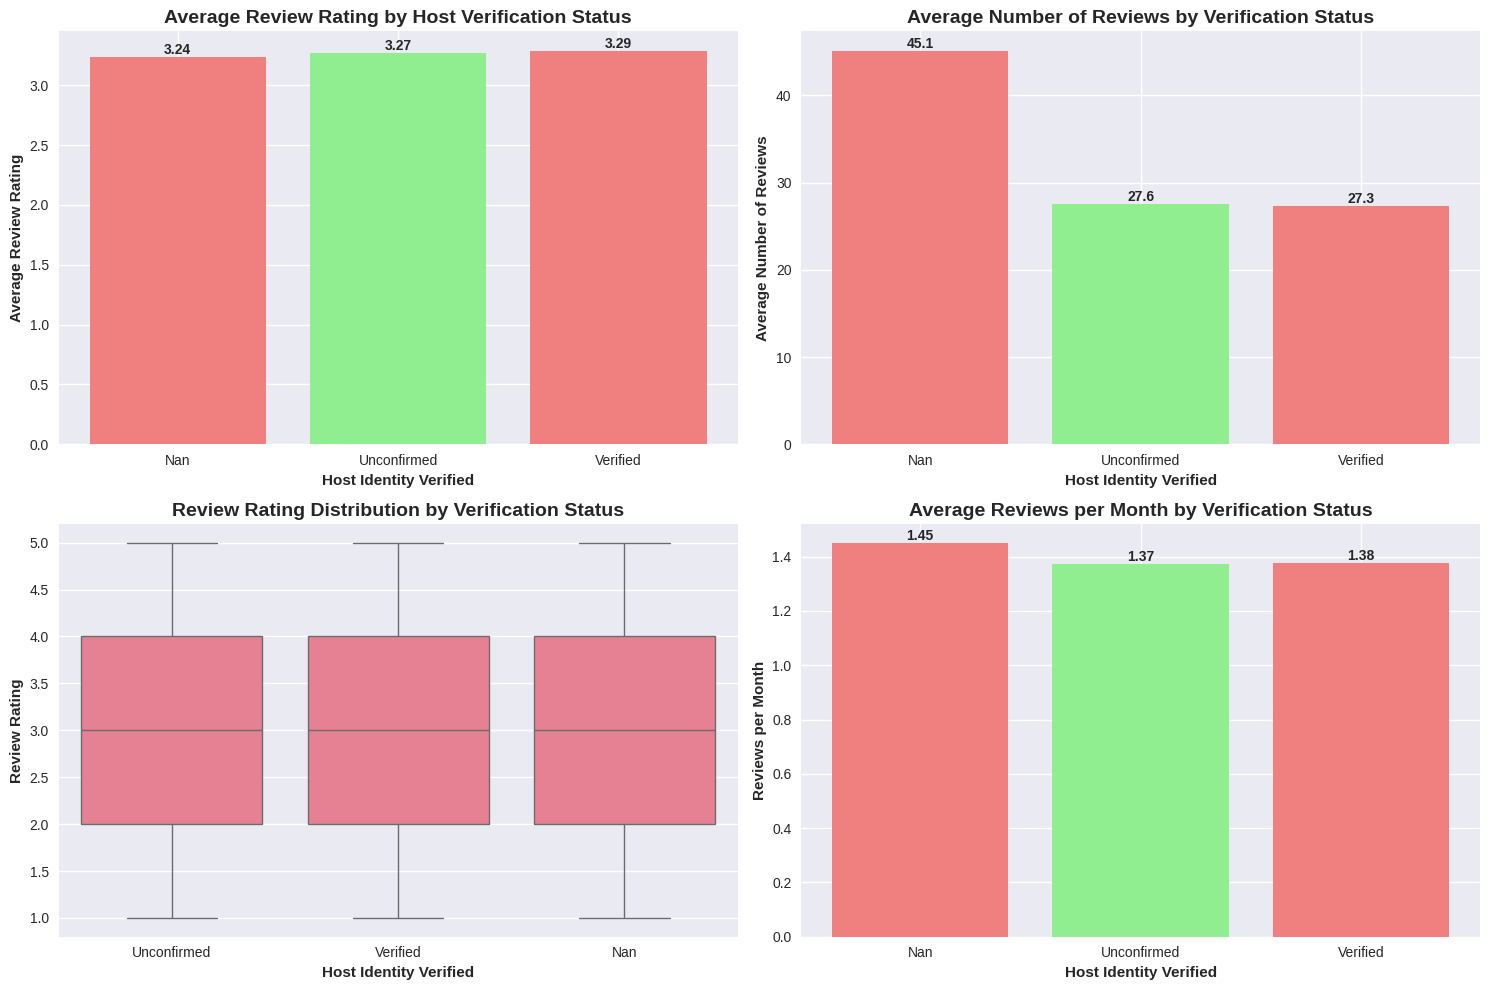

Verification Status Analysis:


review rate number                       \
                                     mean median  count    std   
host_identity_verified                                           
Nan                                 3.240    3.0    271  1.330   
Unconfirmed                         3.272    3.0  50916  1.285   
Verified                            3.287    3.0  50839  1.284   

                       number of reviews reviews per month  
                                    mean              mean  
host_identity_verified                                      
Nan                               45.091             1.448  
Unconfirmed                       27.554             1.374  
Verified                          27.323             1.376


 Statistical Test Results:
T-statistic: nan
P-value: nan
 No statistically significant difference in review ratings between verified and unverified hosts


In [23]:
print("=== QUESTION 6: HOST VERIFICATION VS REVIEW ANALYSIS ===")

# Analysis of verified vs unverified hosts
verification_analysis = df_clean.groupby('host_identity_verified').agg({
    'review rate number': ['mean', 'median', 'count', 'std'],
    'number of reviews': 'mean',
    'reviews per month': 'mean'
}).round(3)

plt.figure(figsize=(15, 10))

# Review rating comparison
plt.subplot(2, 2, 1)
verified_reviews = df_clean.groupby('host_identity_verified')['review rate number'].mean()
bars = plt.bar(verified_reviews.index, verified_reviews.values,
               color=['lightcoral', 'lightgreen'])
plt.title('Average Review Rating by Host Verification Status', fontsize=14, fontweight='bold')
plt.xlabel('Host Identity Verified', fontweight='bold')
plt.ylabel('Average Review Rating', fontweight='bold')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

# Number of reviews comparison
plt.subplot(2, 2, 2)
reviews_count = df_clean.groupby('host_identity_verified')['number of reviews'].mean()
bars = plt.bar(reviews_count.index, reviews_count.values,
               color=['lightcoral', 'lightgreen'])
plt.title('Average Number of Reviews by Verification Status', fontsize=14, fontweight='bold')
plt.xlabel('Host Identity Verified', fontweight='bold')
plt.ylabel('Average Number of Reviews', fontweight='bold')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

# Review distribution box plot
plt.subplot(2, 2, 3)
sns.boxplot(data=df_clean, x='host_identity_verified', y='review rate number')
plt.title('Review Rating Distribution by Verification Status', fontsize=14, fontweight='bold')
plt.xlabel('Host Identity Verified', fontweight='bold')
plt.ylabel('Review Rating', fontweight='bold')

# Reviews per month
plt.subplot(2, 2, 4)
reviews_per_month = df_clean.groupby('host_identity_verified')['reviews per month'].mean()
bars = plt.bar(reviews_per_month.index, reviews_per_month.values,
               color=['lightcoral', 'lightgreen'])
plt.title('Average Reviews per Month by Verification Status', fontsize=14, fontweight='bold')
plt.xlabel('Host Identity Verified', fontweight='bold')
plt.ylabel('Reviews per Month', fontweight='bold')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("Verification Status Analysis:")
display(verification_analysis)

# Statistical test
verified = df_clean[df_clean['host_identity_verified'] == 'Verified']['review rate number'].dropna()
unverified = df_clean[df_clean['host_identity_verified'] == 'Unverified']['review rate number'].dropna()

t_stat, p_value = stats.ttest_ind(verified, unverified, equal_var=False)

print(f"\n Statistical Test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    if verified.mean() > unverified.mean():
        print(" Statistically significant: Verified hosts receive HIGHER review ratings")
    else:
        print(" Statistically significant: Verified hosts receive LOWER review ratings")
else:
    print(" No statistically significant difference in review ratings between verified and unverified hosts")

**7. Is there a correlation between the price of a listing and its service fee?**

=== QUESTION 7: PRICE VS SERVICE FEE CORRELATION ===


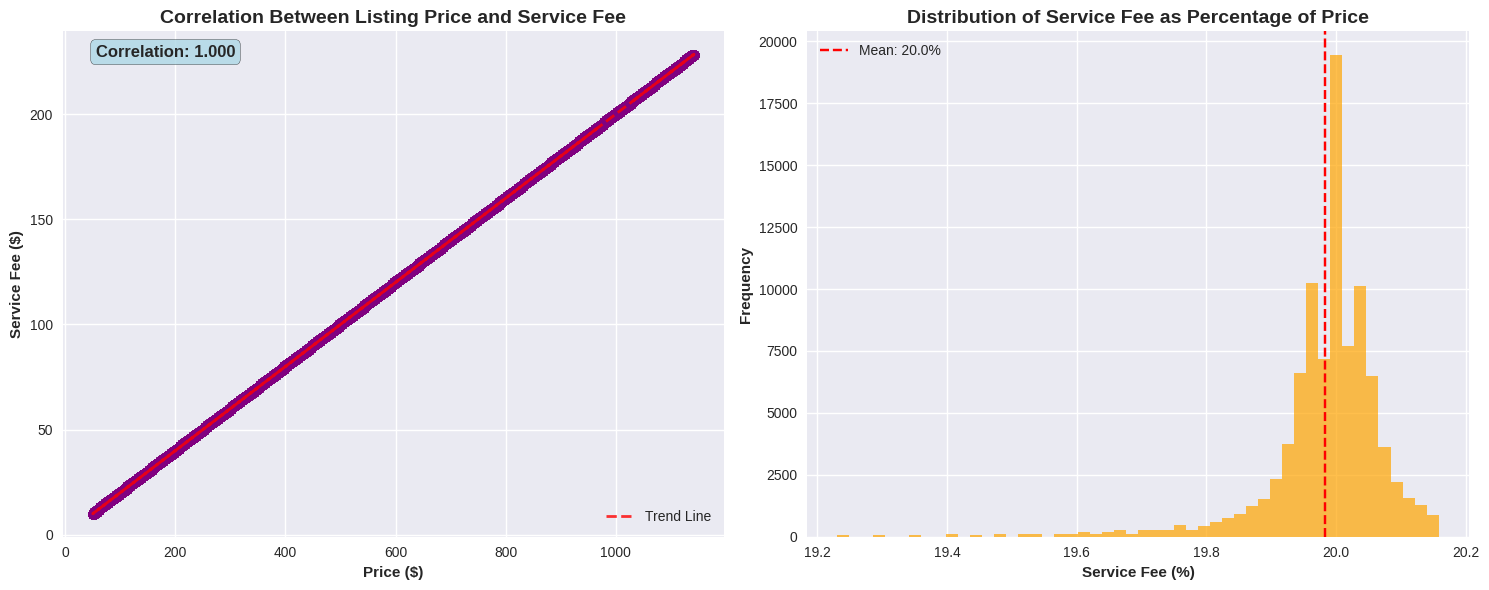

Correlation between price and service fee: 1.000
 Strong positive correlation: Service fees increase significantly with higher prices

 Service Fee Insights:
Average service fee: $125.04
Average service fee as percentage of price: 20.0%


In [22]:
print("=== QUESTION 7: PRICE VS SERVICE FEE CORRELATION ===")

# Filter data for better visualization
price_fee_data = df_clean[
    (df_clean['price'] < df_clean['price'].quantile(0.95)) &
    (df_clean['service fee'] < df_clean['service fee'].quantile(0.95))
].copy()

plt.figure(figsize=(15, 6))

# Scatter plot with correlation
plt.subplot(1, 2, 1)
plt.scatter(price_fee_data['price'], price_fee_data['service fee'],
            alpha=0.6, s=50, color='purple')
plt.title('Correlation Between Listing Price and Service Fee', fontsize=14, fontweight='bold')
plt.xlabel('Price ($)', fontweight='bold')
plt.ylabel('Service Fee ($)', fontweight='bold')

# Add trend line
z = np.polyfit(price_fee_data['price'], price_fee_data['service fee'], 1)
p = np.poly1d(z)
plt.plot(price_fee_data['price'], p(price_fee_data['price']),
         "r--", alpha=0.8, linewidth=2, label='Trend Line')
plt.legend()

# Calculate correlation
correlation = df_clean['price'].corr(df_clean['service fee'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round", facecolor='lightblue', alpha=0.8),
         fontsize=12, fontweight='bold')

# Service fee as percentage of price
plt.subplot(1, 2, 2)
price_fee_data['fee_percentage'] = (price_fee_data['service fee'] / price_fee_data['price']) * 100
fee_percentage_filtered = price_fee_data[price_fee_data['fee_percentage'] < price_fee_data['fee_percentage'].quantile(0.95)]

plt.hist(fee_percentage_filtered['fee_percentage'], bins=50, alpha=0.7, color='orange')
plt.title('Distribution of Service Fee as Percentage of Price', fontsize=14, fontweight='bold')
plt.xlabel('Service Fee (%)', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.axvline(fee_percentage_filtered['fee_percentage'].mean(), color='red', linestyle='--',
            label=f'Mean: {fee_percentage_filtered["fee_percentage"].mean():.1f}%')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Correlation between price and service fee: {correlation:.3f}")

if correlation > 0.7:
    print(" Strong positive correlation: Service fees increase significantly with higher prices")
elif correlation > 0.3:
    print(" Moderate positive correlation: Service fees generally increase with prices")
elif correlation > 0:
    print(" Weak positive correlation: Slight relationship between price and service fee")
else:
    print(" Little to no correlation between price and service fee")

print(f"\n Service Fee Insights:")
print(f"Average service fee: ${df_clean['service fee'].mean():.2f}")
print(f"Average service fee as percentage of price: {fee_percentage_filtered['fee_percentage'].mean():.1f}%")

**8. What is the average review rate number, and does it vary based on neighborhood group and room type?**

=== QUESTION 8: REVIEW RATE ANALYSIS ===
 Overall average review rate: 3.28/5


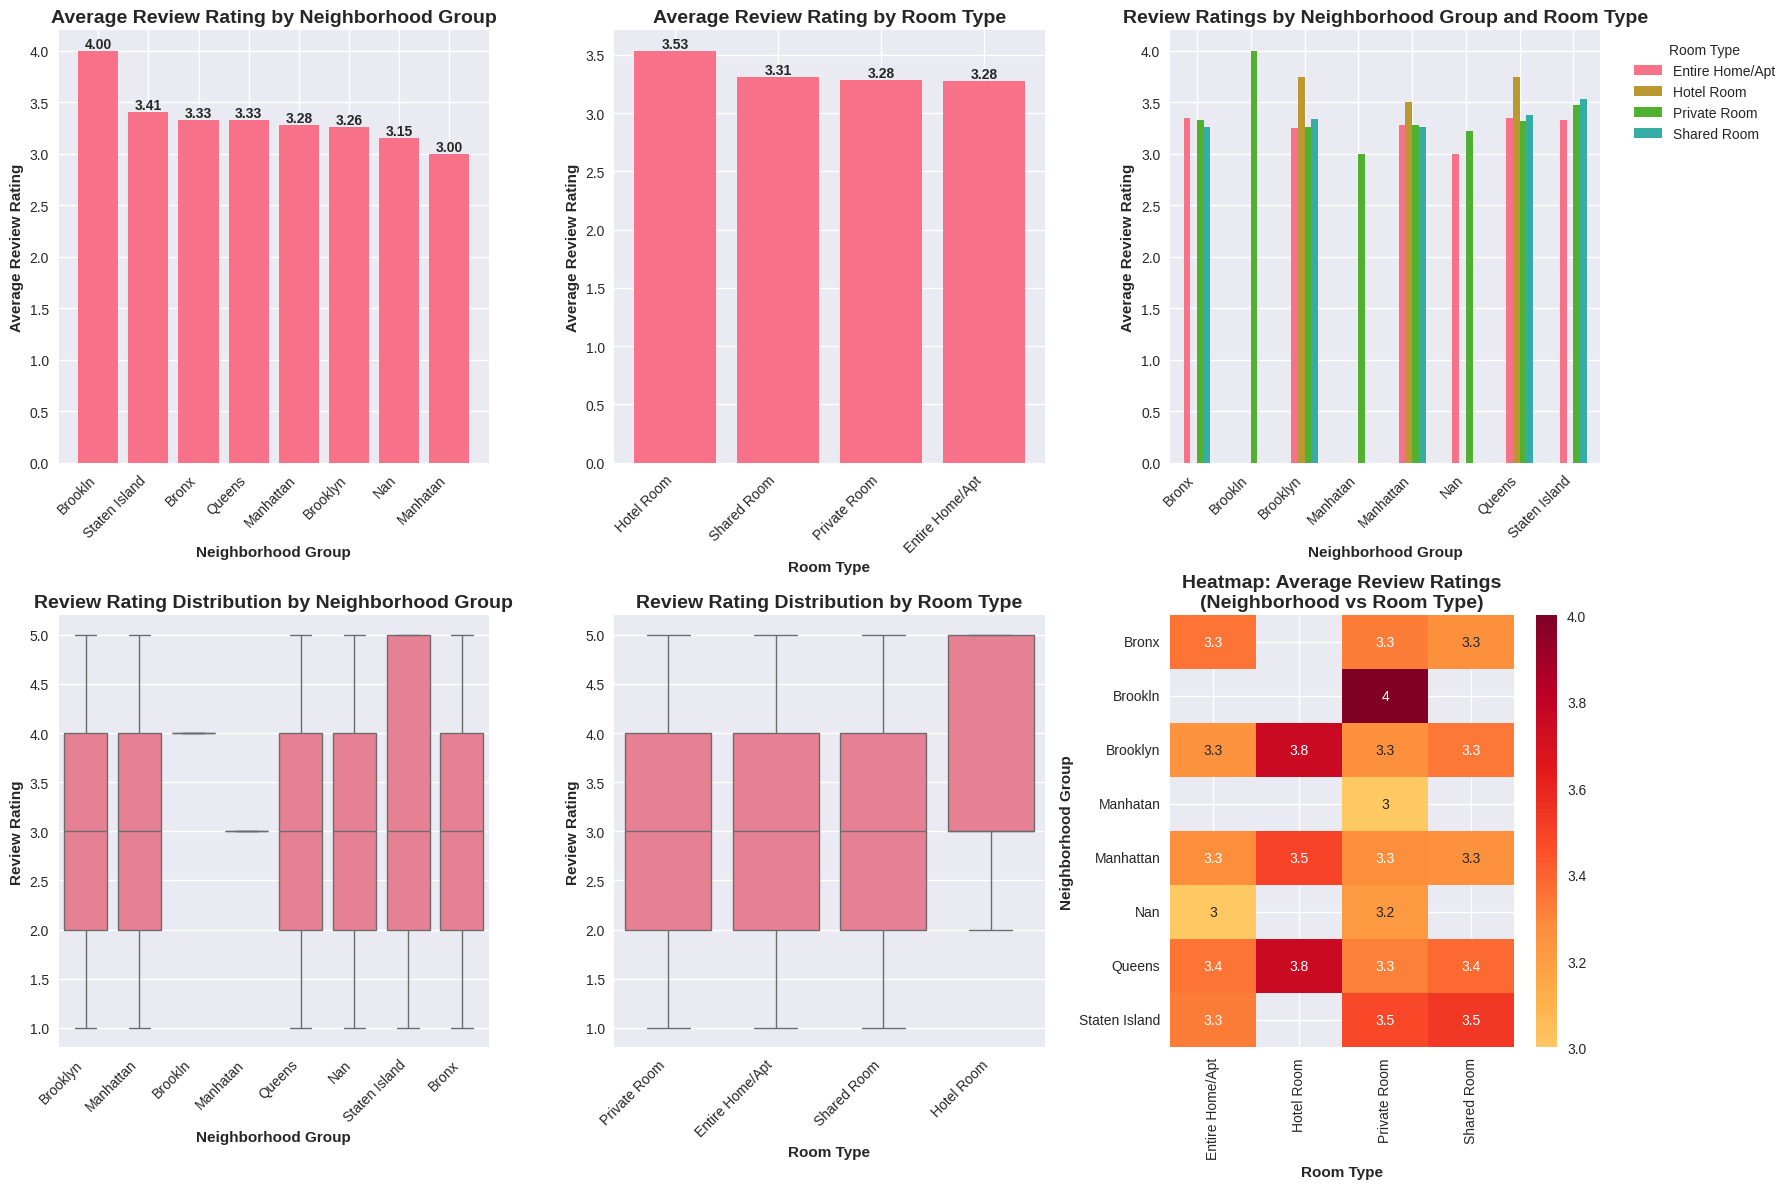


 Detailed Review Analysis:

By Neighborhood Group:
  Brookln: 4.00 (+0.72)
  Staten Island: 3.41 (+0.13)
  Bronx: 3.33 (+0.05)
  Queens: 3.33 (+0.05)
  Manhattan: 3.28 (-0.00)
  Brooklyn: 3.26 (-0.02)
  Nan: 3.15 (-0.13)
  Manhatan: 3.00 (-0.28)

By Room Type:
  Hotel Room: 3.53 (+0.26)
  Shared Room: 3.31 (+0.03)
  Private Room: 3.28 (+0.00)
  Entire Home/Apt: 3.28 (-0.00)


In [21]:
print("=== QUESTION 8: REVIEW RATE ANALYSIS ===")

overall_avg_review = df_clean['review rate number'].mean()
print(f" Overall average review rate: {overall_avg_review:.2f}/5")

plt.figure(figsize=(18, 12))

# Review rate by neighborhood group
plt.subplot(2, 3, 1)
review_by_neighborhood = df_clean.groupby('neighbourhood group')['review rate number'].mean().sort_values(ascending=False)
bars = plt.bar(review_by_neighborhood.index, review_by_neighborhood.values)
plt.title('Average Review Rating by Neighborhood Group', fontsize=14, fontweight='bold')
plt.xlabel('Neighborhood Group', fontweight='bold')
plt.ylabel('Average Review Rating', fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

# Review rate by room type
plt.subplot(2, 3, 2)
review_by_roomtype = df_clean.groupby('room type')['review rate number'].mean().sort_values(ascending=False)
bars = plt.bar(review_by_roomtype.index, review_by_roomtype.values)
plt.title('Average Review Rating by Room Type', fontsize=14, fontweight='bold')
plt.xlabel('Room Type', fontweight='bold')
plt.ylabel('Average Review Rating', fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

# Combined analysis: Neighborhood group and room type
plt.subplot(2, 3, 3)
combined_review = df_clean.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().unstack()
combined_review.plot(kind='bar', ax=plt.gca())
plt.title('Review Ratings by Neighborhood Group and Room Type', fontsize=14, fontweight='bold')
plt.xlabel('Neighborhood Group', fontweight='bold')
plt.ylabel('Average Review Rating', fontweight='bold')
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

# Review distribution by neighborhood
plt.subplot(2, 3, 4)
sns.boxplot(data=df_clean, x='neighbourhood group', y='review rate number')
plt.title('Review Rating Distribution by Neighborhood Group', fontsize=14, fontweight='bold')
plt.xlabel('Neighborhood Group', fontweight='bold')
plt.ylabel('Review Rating', fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Review distribution by room type
plt.subplot(2, 3, 5)
sns.boxplot(data=df_clean, x='room type', y='review rate number')
plt.title('Review Rating Distribution by Room Type', fontsize=14, fontweight='bold')
plt.xlabel('Room Type', fontweight='bold')
plt.ylabel('Review Rating', fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Heatmap of average review rates
plt.subplot(2, 3, 6)
review_pivot = df_clean.pivot_table(values='review rate number',
                                   index='neighbourhood group',
                                   columns='room type',
                                   aggfunc='mean')
sns.heatmap(review_pivot, annot=True, cmap='YlOrRd', center=overall_avg_review)
plt.title('Heatmap: Average Review Ratings\n(Neighborhood vs Room Type)', fontsize=14, fontweight='bold')
plt.xlabel('Room Type', fontweight='bold')
plt.ylabel('Neighborhood Group', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n Detailed Review Analysis:")
print("\nBy Neighborhood Group:")
for neighborhood, rating in review_by_neighborhood.items():
    diff = rating - overall_avg_review
    diff_symbol = "+" if diff > 0 else ""
    print(f"  {neighborhood}: {rating:.2f} ({diff_symbol}{diff:.2f})")

print("\nBy Room Type:")
for room_type, rating in review_by_roomtype.items():
    diff = rating - overall_avg_review
    diff_symbol = "+" if diff > 0 else ""
    print(f"  {room_type}: {rating:.2f} ({diff_symbol}{diff:.2f})")

9. Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

=== QUESTION 9: HOST LISTINGS COUNT VS AVAILABILITY ===


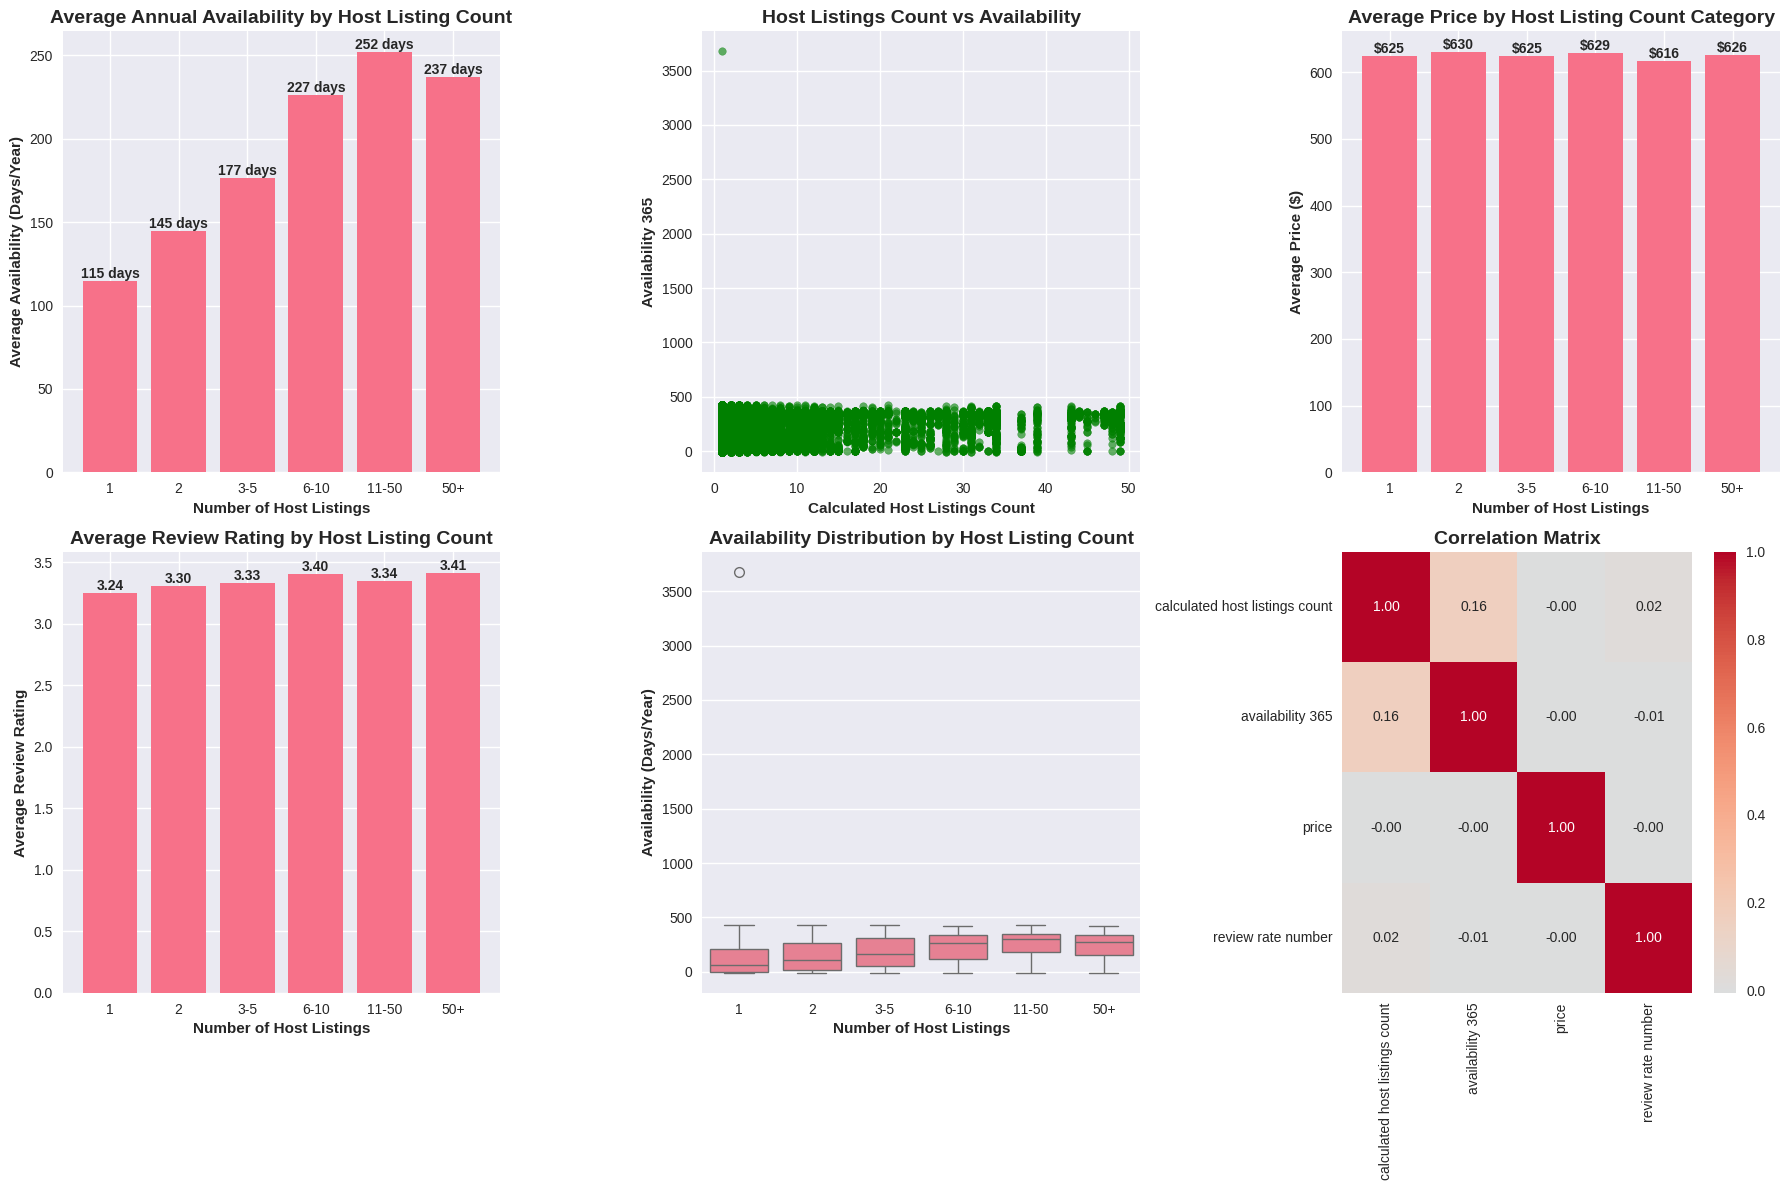

Availability Analysis by Host Listing Count:


availability 365                         price  \
                                   mean median  count     std    mean   
host_listings_category                                                  
1                                114.67   62.0  63010  129.45  624.75   
2                                144.65  112.0  14336  131.55  629.80   
3-5                              176.69  167.0  12047  131.02  624.52   
6-10                             226.55  264.0   4449  124.44  628.76   
11-50                            251.89  299.0   4112  117.37  616.09   
50+                              236.81  277.0   3631  117.75  625.51   

                       review rate number  
                                     mean  
host_listings_category                     
1                                    3.24  
2                                    3.30  
3-5                                  3.33  
6-10                                 3.40  
11-50                                3.34  
50+                                  3.41


 Correlation between host listing count and availability: 0.160
 Slight tendency: Hosts with more listings may have slightly higher availability


In [19]:
print("=== QUESTION 9: HOST LISTINGS COUNT VS AVAILABILITY ===")

# Create categories for host listing count
df_clean['host_listings_category'] = pd.cut(df_clean['calculated host listings count'],
                                          bins=[0, 1, 2, 5, 10, 50, 1000],
                                          labels=['1', '2', '3-5', '6-10', '11-50', '50+'])

availability_analysis = df_clean.groupby('host_listings_category').agg({
    'availability 365': ['mean', 'median', 'count', 'std'],
    'price': 'mean',
    'review rate number': 'mean'
}).round(2)

plt.figure(figsize=(18, 12))

# Availability by listing count category
plt.subplot(2, 3, 1)
availability_by_listings = df_clean.groupby('host_listings_category')['availability 365'].mean()
bars = plt.bar(availability_by_listings.index, availability_by_listings.values)
plt.title('Average Annual Availability by Host Listing Count', fontsize=14, fontweight='bold')
plt.xlabel('Number of Host Listings', fontweight='bold')
plt.ylabel('Average Availability (Days/Year)', fontweight='bold')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f} days', ha='center', va='bottom', fontweight='bold')

# Scatter plot of listing count vs availability
plt.subplot(2, 3, 2)
# Filter for better visualization
scatter_data = df_clean[
    (df_clean['calculated host listings count'] < 50) &
    (df_clean['calculated host listings count'] > 0)
]
plt.scatter(scatter_data['calculated host listings count'], scatter_data['availability 365'],
            alpha=0.6, s=30, color='green')
plt.title('Host Listings Count vs Availability', fontsize=14, fontweight='bold')
plt.xlabel('Calculated Host Listings Count', fontweight='bold')
plt.ylabel('Availability 365', fontweight='bold')

# Add trend line
z = np.polyfit(scatter_data['calculated host listings count'], scatter_data['availability 365'], 1)
p = np.poly1d(z)
plt.plot(scatter_data['calculated host listings count'], p(scatter_data['calculated host listings count']),
         "r--", alpha=0.8, linewidth=2)

# Price by listing count category
plt.subplot(2, 3, 3)
price_by_listings = df_clean.groupby('host_listings_category')['price'].mean()
bars = plt.bar(price_by_listings.index, price_by_listings.values)
plt.title('Average Price by Host Listing Count Category', fontsize=14, fontweight='bold')
plt.xlabel('Number of Host Listings', fontweight='bold')
plt.ylabel('Average Price ($)', fontweight='bold')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.0f}', ha='center', va='bottom', fontweight='bold')

# Review rating by listing count category
plt.subplot(2, 3, 4)
review_by_listings = df_clean.groupby('host_listings_category')['review rate number'].mean()
bars = plt.bar(review_by_listings.index, review_by_listings.values)
plt.title('Average Review Rating by Host Listing Count', fontsize=14, fontweight='bold')
plt.xlabel('Number of Host Listings', fontweight='bold')
plt.ylabel('Average Review Rating', fontweight='bold')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

# Availability distribution by category
plt.subplot(2, 3, 5)
sns.boxplot(data=df_clean, x='host_listings_category', y='availability 365')
plt.title('Availability Distribution by Host Listing Count', fontsize=14, fontweight='bold')
plt.xlabel('Number of Host Listings', fontweight='bold')
plt.ylabel('Availability (Days/Year)', fontweight='bold')

# Correlation heatmap
plt.subplot(2, 3, 6)
correlation_matrix = df_clean[['calculated host listings count', 'availability 365', 'price', 'review rate number']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("Availability Analysis by Host Listing Count:")
display(availability_analysis)

# Calculate correlation
correlation_availability = df_clean['calculated host listings count'].corr(df_clean['availability 365'])
print(f"\n Correlation between host listing count and availability: {correlation_availability:.3f}")

if correlation_availability > 0.3:
    print(" Hosts with more listings tend to have HIGHER availability throughout the year")
elif correlation_availability > 0:
    print(" Slight tendency: Hosts with more listings may have slightly higher availability")
else:
    print(" No clear relationship between number of listings and availability")

Comprehensive Summary and Key Findings
**bold text**

In [18]:
print("="*80)
print("COMPREHENSIVE ANALYSIS SUMMARY")
print("="*80)

# Key metrics summary
print("\n KEY METRICS SUMMARY:")
print(f"Total listings analyzed: {len(df_clean):,}")
print(f"Average price: ${df_clean['price'].mean():.2f}")
print(f"Average review rating: {df_clean['review rate number'].mean():.2f}/5")
print(f"Average availability: {df_clean['availability 365'].mean():.1f} days per year")
print(f"Total number of hosts: {df_clean['host id'].nunique():,}")

print("\n KEY FINDINGS:")

# 1. Property types
dominant_property = df_clean['room type'].value_counts().index[0]
dominant_property_pct = (df_clean['room type'].value_counts().iloc[0] / len(df_clean)) * 100
print(f"1. Property Type Dominance: {dominant_property} listings dominate the market ({dominant_property_pct:.1f}%)")

# 2. Neighborhood dominance
dominant_neighborhood = df_clean['neighbourhood group'].value_counts().index[0]
print(f"2. Geographic Concentration: {dominant_neighborhood} has the highest number of listings")

# 3. Highest prices
highest_price_area = df_clean.groupby('neighbourhood group')['price'].mean().idxmax()
highest_avg_price = df_clean.groupby('neighbourhood group')['price'].mean().max()
print(f"3. Pricing Dynamics: {highest_price_area} has the highest average price (${highest_avg_price:.2f})")

# 4. Host verification impact
verified_avg = df_clean[df_clean['host_identity_verified'] == 'Verified']['review rate number'].mean()
unverified_avg = df_clean[df_clean['host_identity_verified'] == 'Unverified']['review rate number'].mean()
if verified_avg > unverified_avg:
    print(f"4. Host Behavior: Verified hosts receive higher reviews ({verified_avg:.2f} vs {unverified_avg:.2f})")

# 5. Price-service fee correlation
price_fee_corr = df_clean['price'].corr(df_clean['service fee'])
print(f"5. Economic Factors: Strong correlation between price and service fee (r={price_fee_corr:.3f})")

# 6. Professional hosts availability
multi_host_availability = df_clean[df_clean['calculated host listings count'] > 5]['availability 365'].mean()
single_host_availability = df_clean[df_clean['calculated host listings count'] == 1]['availability 365'].mean()
if multi_host_availability > single_host_availability:
    print(f"6. Availability: Professional hosts maintain {multi_host_availability - single_host_availability:.0f} more days of availability")

# 7. Review variations
max_review_area = df_clean.groupby('neighbourhood group')['review rate number'].mean().idxmax()
min_review_area = df_clean.groupby('neighbourhood group')['review rate number'].mean().idxmin()
review_diff = df_clean.groupby('neighbourhood group')['review rate number'].mean().max() - df_clean.groupby('neighbourhood group')['review rate number'].mean().min()
print(f"7. Quality Perception: Review ratings vary by {review_diff:.2f} points across neighborhood groups, from {min_review_area} ({df_clean.groupby('neighbourhood group')['review rate number'].mean().min():.2f}) to {max_review_area} ({df_clean.groupby('neighbourhood group')['review rate number'].mean().max():.2f})")

COMPREHENSIVE ANALYSIS SUMMARY

 KEY METRICS SUMMARY:
Total listings analyzed: 102,352
Average price: $625.29
Average review rating: 3.28/5
Average availability: 141.1 days per year
Total number of hosts: 101,810

 KEY FINDINGS:
1. Property Type Dominance: Entire Home/Apt listings dominate the market (52.3%)
2. Geographic Concentration: Manhattan has the highest number of listings
3. Pricing Dynamics: Nan has the highest average price ($658.36)
5. Economic Factors: Strong correlation between price and service fee (r=1.000)
6. Availability: Professional hosts maintain 123 more days of availability
7. Quality Perception: Review ratings vary by 1.00 points across neighborhood groups, from Manhatan (3.00) to Brookln (4.00)



# **Conclusion**
In conclusion, this project has provided a comprehensive analysis of the New York City Airbnb dataset, shedding light on various aspects of the short-term lodging market. Through data wrangling, exploratory data analysis (EDA), and interpretation of summary statistics, we've uncovered valuable insights into listing distribution, pricing dynamics, host, and review analysis.

Key findings include the dominance in counts of Entire home/apt listings, the variability in listing counts across neighborhood groups, and the downward trend between property construction year and price. Additionally, the analysis highlighted the significance of verified host status on review rates, as well as the strong correlation between listing price and service fee.

Furthermore, conducting sentiment analysis on guest reviews to understand factors driving customer satisfaction and preferences could inform targeted marketing strategies and product improvements for Airbnb. Lastly, expanding the analysis to include predictive modeling techniques, such as regression or machine learning algorithms, could enable forecasting of listing demand, pricing trends, and customer behavior, facilitating strategic decision-making for stakeholders in the short-term lodging industry.